In [6]:
'''
Relationship Analysis 
Figure 13: Severity Score vs Reporting Time Scatter Diagram 
'''
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv("../data/data-security-incidents-trends-2023-2024_enhanced.csv") 

# Drop missing values
filtered_df = df[['reporting_time_hrs', 'severity_score']].dropna()

# Create scatter plot with linear trendline
fig = px.scatter(
    filtered_df,
    x='reporting_time_hrs',
    y='severity_score',
    trendline='ols',
    title='Severity Score vs Reporting Time',
    labels={
        'reporting_time_hrs': 'Reporting Time (Hours)',
        'severity_score': 'Severity Score (1–10)'
    }
)

fig.update_traces(marker=dict(size=7, opacity=0.6))
fig.update_layout(
    xaxis_title='Reporting Time (hrs)',
    yaxis_title='Severity Score',
    plot_bgcolor='white'
)

fig.show()


In [8]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("../data/enhanced_data2.csv")  # Adjust path if needed

# Filter data
filtered_df = df[['severity_score', 'data_types_per_incident']].dropna()

# Create scatter plot without color
fig = px.scatter(
    filtered_df,
    x='data_types_per_incident',
    y='severity_score',
    title='Severity Score vs Number of Data Types per Incident',
    labels={
        'data_types_per_incident': 'Number of Data Types Involved',
        'severity_score': 'Severity Score (1–10)'
    }
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    xaxis_title='Number of Data Types per Incident',
    yaxis_title='Severity Score',
    plot_bgcolor='white'
)

fig.show()



Pearson Correlation Coefficients:
+----------------------+--------------------+----------------+----------------------+------------------+
|                      | Number of Subjects | Severity Score | Reporting Time (hrs) | Data Types Count |
+----------------------+--------------------+----------------+----------------------+------------------+
|  Number of Subjects  |        1.0         |     0.439      |        0.011         |      0.049       |
|    Severity Score    |       0.439        |      1.0       |         0.83         |      0.324       |
| Reporting Time (hrs) |       0.011        |      0.83      |         1.0          |      -0.004      |
|   Data Types Count   |       0.049        |     0.324      |        -0.004        |       1.0        |
+----------------------+--------------------+----------------+----------------------+------------------+


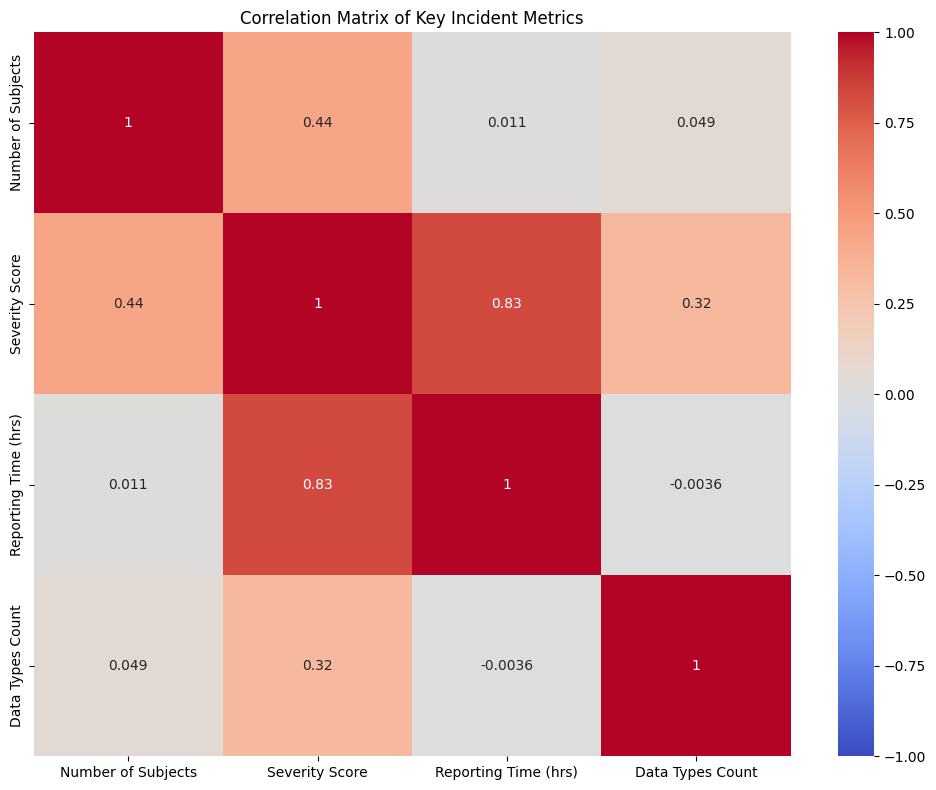


Correlation Interpretation:
+-------------------------------+-------------+----------+-----------------------------+
|         Relationship          | Correlation | Strength |       Interpretation        |
+-------------------------------+-------------+----------+-----------------------------+
|     Subjects vs. Severity     |    0.439    |  Medium  | Medium positive correlation |
|  Subjects vs. Reporting Time  |    0.011    |  Small   | Small positive correlation  |
|    Subjects vs. Data Types    |    0.049    |  Small   | Small positive correlation  |
|  Severity vs. Reporting Time  |    0.830    |  Large   | Large positive correlation  |
|    Severity vs. Data Types    |    0.324    |  Medium  | Medium positive correlation |
| Reporting Time vs. Data Types |   -0.004    |  Small   | Small negative correlation  |
+-------------------------------+-------------+----------+-----------------------------+


In [8]:
'''
Correlation Analysis 
Figure 11: Pearsons Correlations Analysis 
Figure 12: Correlations interpretation
Figure 13: Correlations heatmap
'''


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load the dataset
df = pd.read_csv("../data/data-security-incidents-trends-2023-2024_enhanced.csv") 

# Calculate Pearson correlation
correlation_matrix = df[['subjects_num', 'severity_score', 'reporting_time_hrs', 'data_types_per_incident']].corr(method='pearson')

# Create a prettier variable names mapping
variable_names = {
    'subjects_num': 'Number of Subjects',
    'severity_score': 'Severity Score',
    'reporting_time_hrs': 'Reporting Time (hrs)',
    'data_types_per_incident': 'Data Types Count'
}

# Format correlation matrix 
formatted_matrix = correlation_matrix.copy()
formatted_matrix.index = [variable_names.get(idx, idx) for idx in formatted_matrix.index]
formatted_matrix.columns = [variable_names.get(col, col) for col in formatted_matrix.columns]

# Print formatted table
print("\nPearson Correlation Coefficients:")
print(tabulate(formatted_matrix.round(3), headers='keys', tablefmt='pretty', showindex=True))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            xticklabels=[variable_names.get(col, col) for col in correlation_matrix.columns],
            yticklabels=[variable_names.get(idx, idx) for idx in correlation_matrix.index])
plt.title('Correlation Matrix of Key Incident Metrics')
plt.tight_layout()
plt.show()

# Add interpretation table
interpretation = {
    'Relationship': [
        'Subjects vs. Severity',
        'Subjects vs. Reporting Time',
        'Subjects vs. Data Types',
        'Severity vs. Reporting Time',
        'Severity vs. Data Types',
        'Reporting Time vs. Data Types'
    ],
    'Correlation': [
        f"{correlation_matrix.loc['subjects_num', 'severity_score']:.3f}",
        f"{correlation_matrix.loc['subjects_num', 'reporting_time_hrs']:.3f}",
        f"{correlation_matrix.loc['subjects_num', 'data_types_per_incident']:.3f}",
        f"{correlation_matrix.loc['severity_score', 'reporting_time_hrs']:.3f}",
        f"{correlation_matrix.loc['severity_score', 'data_types_per_incident']:.3f}",
        f"{correlation_matrix.loc['reporting_time_hrs', 'data_types_per_incident']:.3f}"
    ],
    'Strength': [],
    'Interpretation': []
}

# Add strength and interpretation
for corr_str in interpretation['Correlation']:
    corr = float(corr_str)
    abs_corr = abs(corr)
    
    # Determine strength Based on Cohens's, 1988    
    if abs_corr < 0.3:
        strength = 'Small'
    elif abs_corr < 0.7:
        strength = 'Medium'
    else:
        strength = 'Large'
    
    # Create interpretation
    direction = 'positive' if corr > 0 else 'negative'
    interpretation['Strength'].append(strength)
    interpretation['Interpretation'].append(f"{strength} {direction} correlation")

# Print interpretation table
print("\nCorrelation Interpretation:")
print(tabulate(pd.DataFrame(interpretation), headers='keys', tablefmt='pretty', showindex=False))

In [ ]:
"""
Figure 14: Linear Regression Analysis: Predict Reporting Time based on Severity Score
"""

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Add this import

# Load the dataset
df = pd.read_csv("../data/data-security-incidents-trends-2023-2024_enhanced.csv")

# Prepare the data
feature_col = 'severity_score'
target_col = 'reporting_time_hrs'
analysis_df = df[[feature_col, target_col]].dropna()

# Print summary of the data to check
print(f"Total data points: {len(analysis_df)}")
print(f"Severity score range: {analysis_df[feature_col].min()} to {analysis_df[feature_col].max()}")
print(f"Reporting time range: {analysis_df[target_col].min()} to {analysis_df[target_col].max()}")

X = analysis_df[[feature_col]]
y = analysis_df[target_col]

# Train the model on all data
linreg = LinearRegression()
linreg.fit(X, y)

# Get model details
intercept = linreg.intercept_
coefficient = linreg.coef_[0]

# Calculate R-squared score
y_pred = linreg.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.4f}")

print(f"Prediction Formula: Reporting Time = {intercept:.2f} + ({coefficient:.2f} × Severity Score)")

# Predict for severity score 13
severity_score = 13
prediction_df = pd.DataFrame({feature_col: [severity_score]})
prediction = linreg.predict(prediction_df)[0]
print(f"\nPredicted Reporting Time for Severity Score {severity_score}: {prediction:.2f} hours")

# Create a range of severity scores for smooth regression line (0 to 13)
x_values = np.linspace(0, 13, 100)
x_range_df = pd.DataFrame({feature_col: x_values})
y_pred_line = linreg.predict(x_range_df)

# Create the base figure
fig = go.Figure()

# Set random seed for reproducibility
np.random.seed(42)

# Make sure all data points are plotted with jittering to avoid overlap
fig.add_trace(
    go.Scatter(
        x=analysis_df[feature_col] + np.random.normal(0, 0.1, len(analysis_df)), 
        y=analysis_df[target_col],
        mode='markers',
        marker=dict(
            size=8,
            color='rgba(65, 105, 225, 0.7)',
            line=dict(width=1, color='darkblue')
        ),
        name='Data Points',
        hovertemplate='<b>Severity Score:</b> %{x:.1f}<br><b>Reporting Time:</b> %{y:.1f} hrs<extra></extra>'
    )
)

# Add regression line
fig.add_trace(
    go.Scatter(
        x=x_values,
        y=y_pred_line,
        mode='lines',
        name='Regression Line',
        line=dict(color='red', width=3),
        hovertemplate='<b>Severity Score:</b> %{x:.1f}<br><b>Predicted Time:</b> %{y:.1f} hrs<extra></extra>'
    )
)

# Add prediction point for severity score 13
fig.add_trace(
    go.Scatter(
        x=[severity_score],
        y=[prediction],
        mode='markers',
        marker=dict(
            size=15,
            color='green',
            symbol='star',
            line=dict(width=2, color='darkgreen')
        ),
        name=f'Prediction for Score {severity_score}',
        hovertemplate='<b>Severity Score:</b> 13<br><b>Predicted Time:</b> %{y:.1f} hrs<extra></extra>'
    )
)

# Add annotation for the prediction
fig.add_annotation(
    x=severity_score,
    y=prediction,
    text=f"<b>{prediction:.1f} hrs</b>",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="darkgreen",
    ax=40,
    ay=-40,
    font=dict(size=14, color="green")
)

# Add R-squared
fig.add_annotation(
    x=0.25,
    y=0.98,
    xref="paper",
    yref="paper",
    text=f"R² = {r2:.3f}",
    showarrow=False,
    font=dict(size=14),
    align="left",
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="black",
    borderwidth=1,
    borderpad=4
)

# Update layout
fig.update_layout(
    title={
        'text': 'Severity Score vs. Reporting Time',
        'font': {'size': 20, 'color': 'black'},
        'x': 0.5,
        'y': 0.95
    },
    xaxis=dict(
        title={
            'text': 'Severity Score',
            'font': {'size': 16}
        },
        tickfont={'size': 14},
        showgrid=True,
        gridcolor='lightgray',
        range=[0, 13.5],
        tickmode='linear',
        dtick=1
    ),
    yaxis=dict(
        title={
            'text': 'Reporting Time (hours)',
            'font': {'size': 16}
        },
        tickfont={'size': 14},
        showgrid=True,
        gridcolor='lightgray',
        range=[0, max(analysis_df[target_col].max(), prediction) * 1.1]  # Ensure all points are visible
    ),
    plot_bgcolor='white',
    legend=dict(
        x=0.02,
        y=0.98,
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='lightgray',
        borderwidth=1,
        yanchor="top"
    ),
    margin=dict(l=80, r=80, t=100, b=80),
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        bordercolor="black"
    )
)

fig.show()

# Print a table of the data points for verification
print("\nSample of Data Points (first 10):")
print(analysis_df.head(10))

Total data points: 63549
Severity score range: 1.0 to 10.0
Reporting time range: 12.0 to 192.0
R-squared: 0.6889
Prediction Formula: Reporting Time = -35.51 + (47.13 × Severity Score)

Predicted Reporting Time for Severity Score 13: 577.12 hours



Sample of Data Points (first 10):
   severity_score  reporting_time_hrs
0             1.0                12.0
1             1.0                12.0
2             1.0                12.0
3             1.0                12.0
4             1.0                12.0
5             1.0                12.0
6             2.0                48.0
7             2.0                48.0
8             2.0                48.0
9             2.0                48.0
